# **Import**

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# **Data Load**

In [ ]:
cd /content/drive/MyDrive/[Projects]/Kaggle/NASA 터보팬 제트 엔진의 잔존 수명 예측 및 예지보전 방안/Data

/content/drive/MyDrive/[Projects]/Kaggle/NASA 터보팬 제트 엔진의 잔존 수명 예측 및 예지보전 방안/Data


In [ ]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f's_{i + 1}' for i in range(21)]
col_names = index_names + setting_names + sensor_names

train_df = pd.read_csv('./train_FD001.txt',
                       sep='\s+',
                       header=None,
                       index_col=False,
                       names=col_names)
test_df = pd.read_csv('./test_FD001.txt',
                      sep='\s+',
                      index_col=False,
                      names=col_names)
RUL_df = pd.read_csv('./RUL_FD001.txt',
                     sep='\s+',
                     index_col=False,
                     names=['RUL'])

In [ ]:
train_df

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [ ]:
train_df.to_csv('./train_FD001.csv')

In [ ]:
test_df

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [ ]:
test_df.to_csv('./test_FD001.csv')

In [ ]:
RUL_df

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [ ]:
RUL_df.to_csv('./RUL_FD001.csv')

# **EDA**

## **s1 ~ s21**

In [ ]:
max_cycle = train_df.groupby('unit_number')['time_cycles'].max().reset_index()
max_cycle.columns = ['unit_number', 'max_cycle']

train_df = train_df.merge(max_cycle, on='unit_number', how='left')

train_df['RUL'] = train_df['max_cycle'] - train_df['time_cycles']

In [ ]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    sensor_values = []
    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data_rolling = unit_data.rolling(10).mean()
        plt.plot(unit_data_rolling['RUL'], unit_data_rolling[sensor], alpha=0.7)

        sensor_values.extend(unit_data_rolling[sensor].dropna().values)
    sensor_std = np.std(sensor_values)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(sensor)
    plt.title(f'Trend of {sensor} Across Sampled Units (Std: {sensor_std:.2f})')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    sensor_values = []
    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        sensor_norm = (unit_data[sensor] - unit_data[sensor].min()) / \
                      (unit_data[sensor].max() - unit_data[sensor].min())
        sensor_norm_rolling = sensor_norm.rolling(10).mean()
        plt.plot(unit_data['RUL'], sensor_norm_rolling, alpha=0.7)

        sensor_values.extend(sensor_norm_rolling.dropna().values)
    sensor_std = np.std(sensor_values)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'Normalized {sensor} (rolling mean)')
    plt.title(f'Normalized Trend of {sensor} Across Units (Std: {sensor_std:.2f})')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()

        plt.plot(unit_data['RUL'], unit_data['rolling_std'], alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Rolling Std (window=10)')
    plt.title(f'Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        sensor_norm = (unit_data[sensor] - unit_data[sensor].min()) / \
                      (unit_data[sensor].max() - unit_data[sensor].min())
        sensor_norm_rolling = sensor_norm.rolling(10).std()
        plt.plot(unit_data['RUL'], sensor_norm_rolling, alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'Normalized {sensor} (rolling std)')
    plt.title(f'Normalized Trend of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()
        plt.plot(unit_data['RUL'], unit_data['rolling_std'], alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Rolling Std (window=10)')
    plt.title(f'Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()
        rolling_std_norm = (unit_data['rolling_std'] - unit_data['rolling_std'].min()) / \
                           (unit_data['rolling_std'].max() - unit_data['rolling_std'].min())
        plt.plot(unit_data['RUL'], rolling_std_norm, alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Normalized Rolling Std')
    plt.title(f'Normalized Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

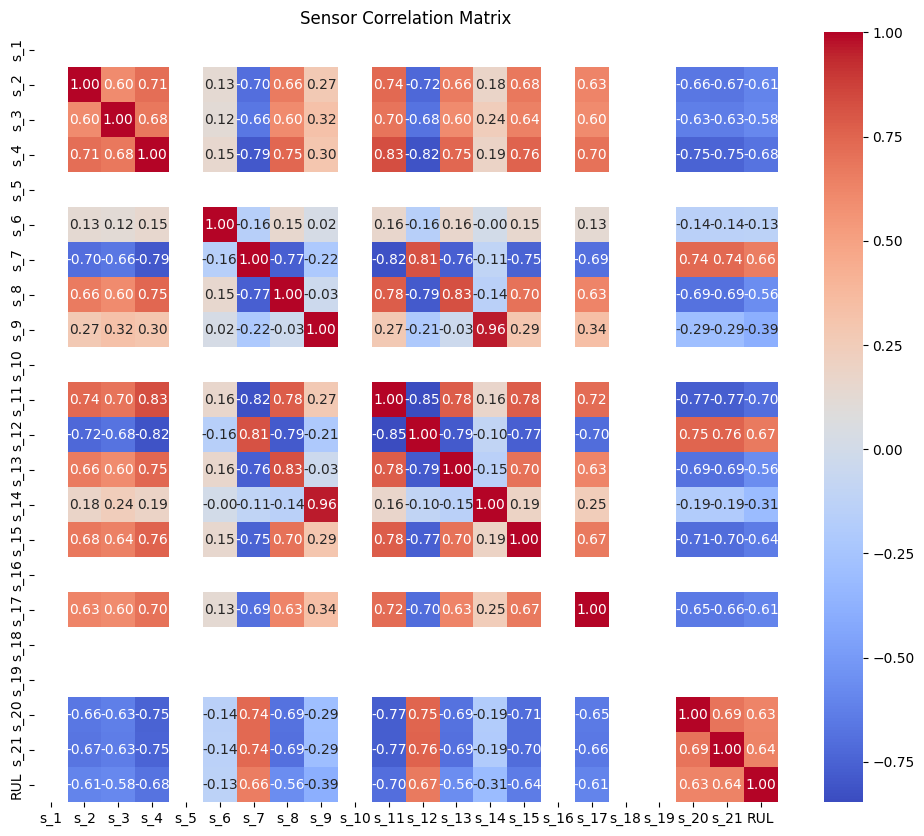

In [ ]:
sensor_data = train_df[sensor_names + ['RUL']]
corr = sensor_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Sensor Correlation Matrix")
plt.show()

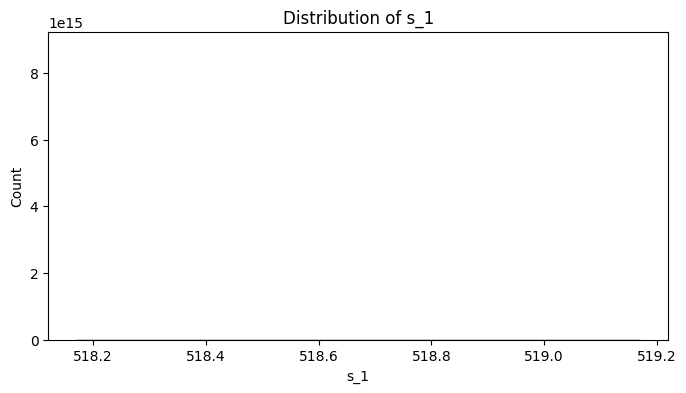

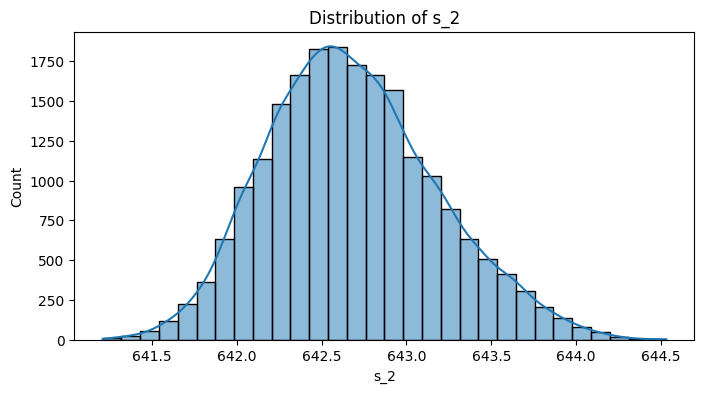

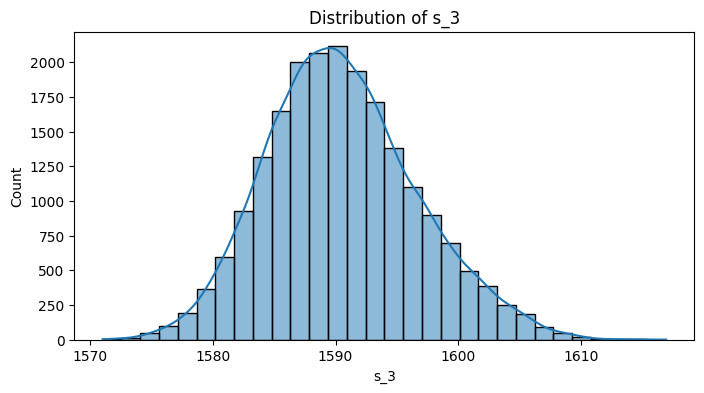

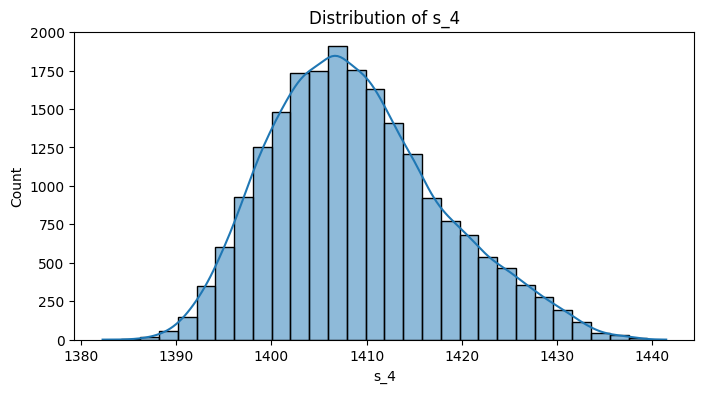

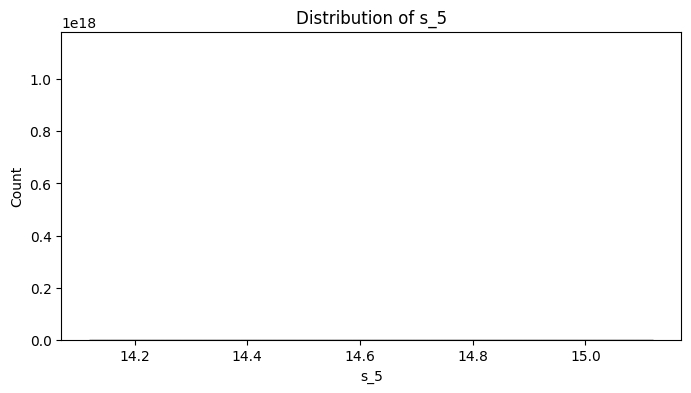

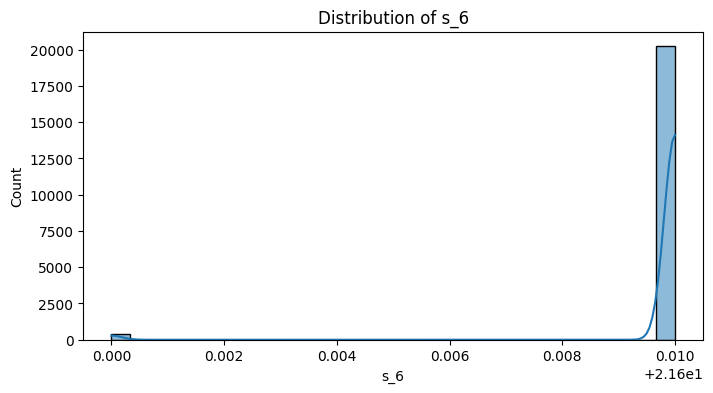

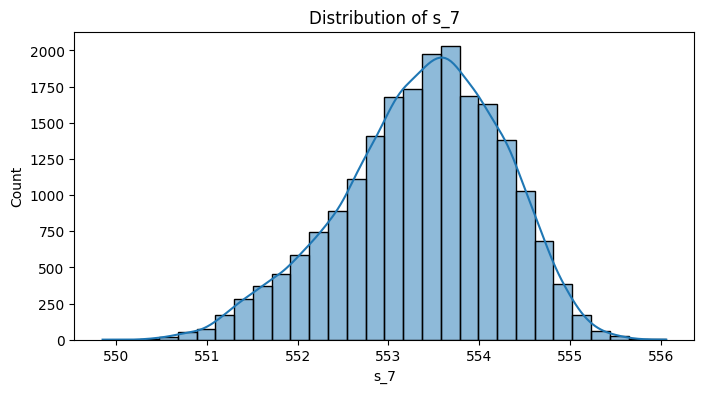

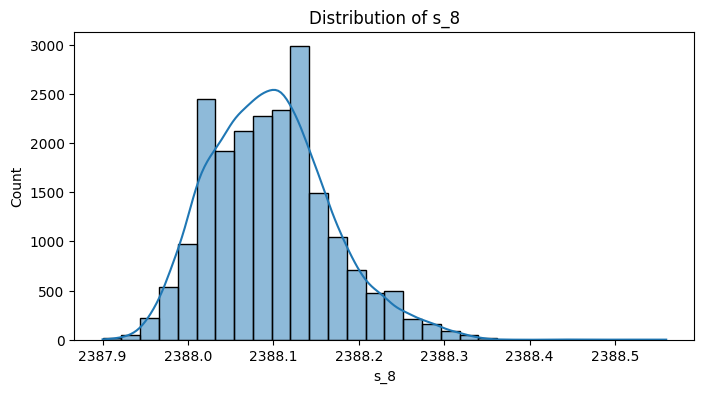

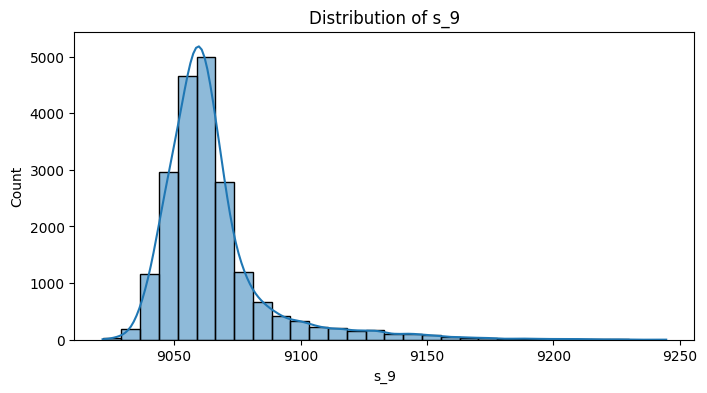

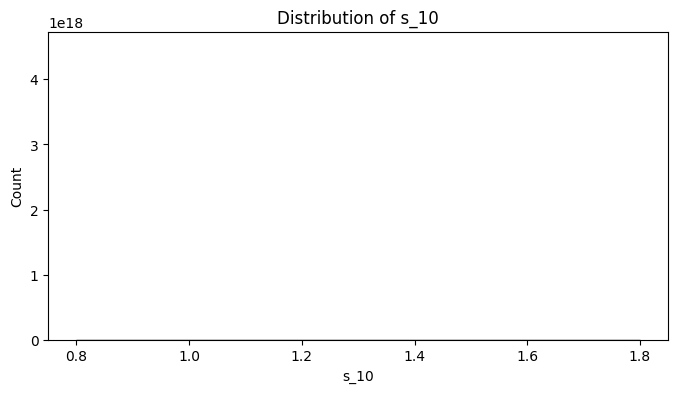

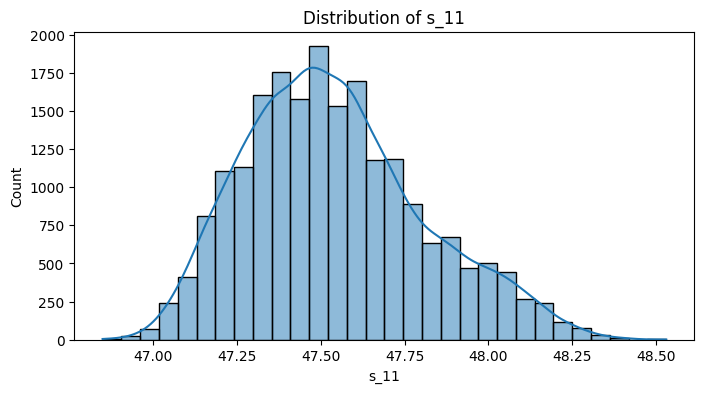

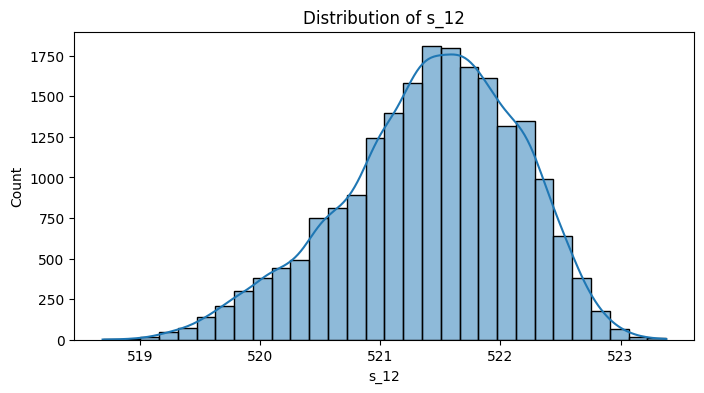

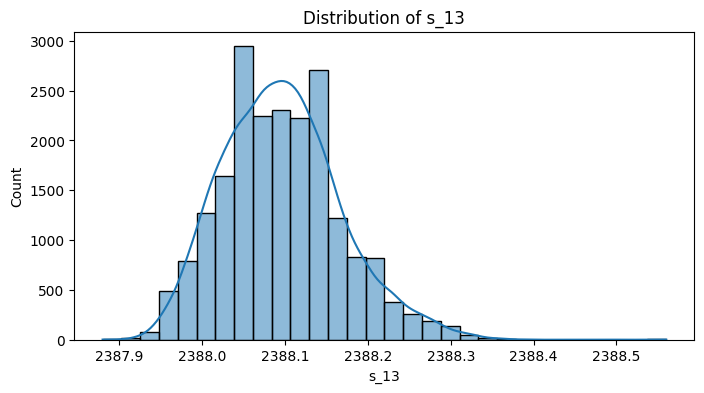

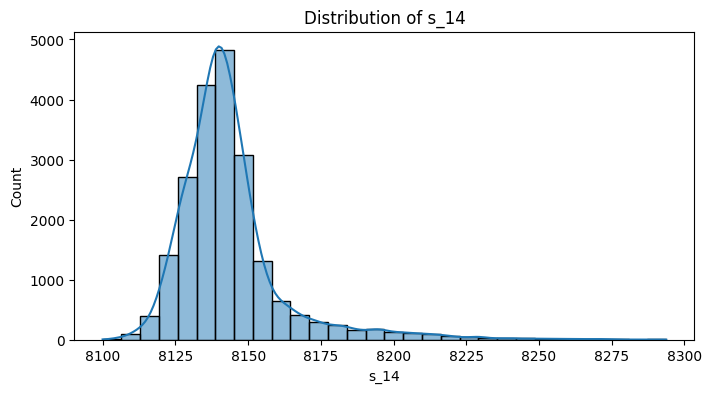

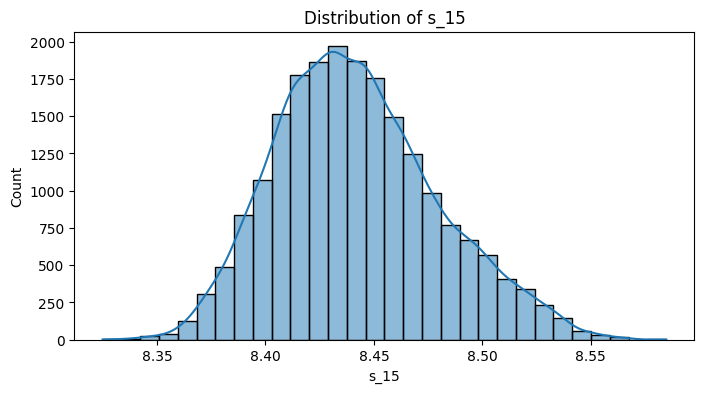

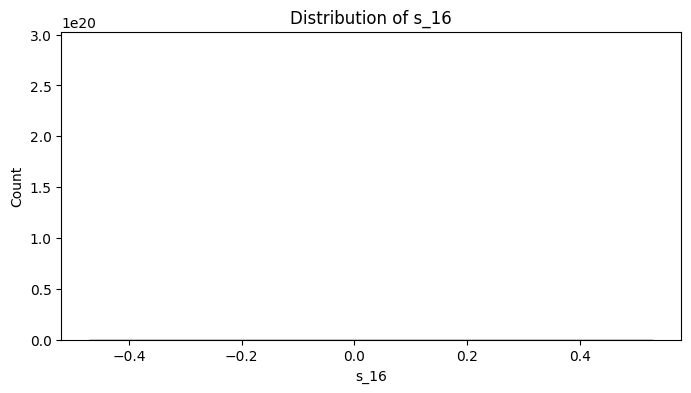

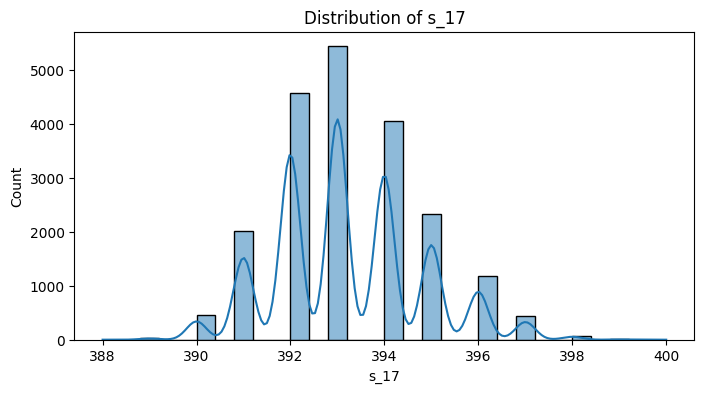

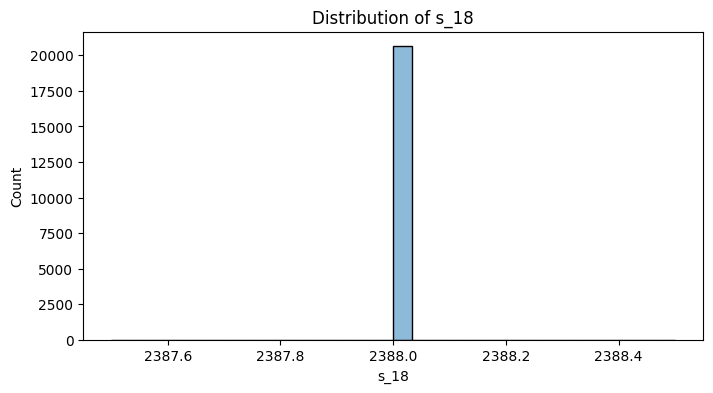

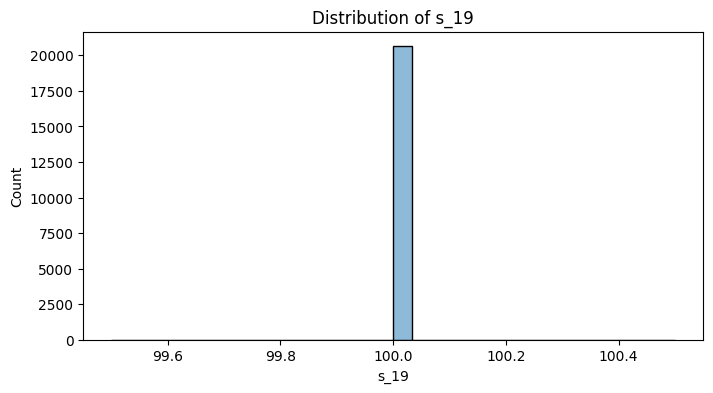

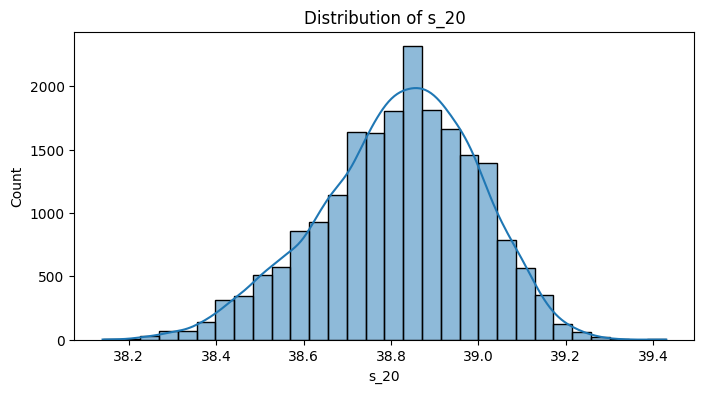

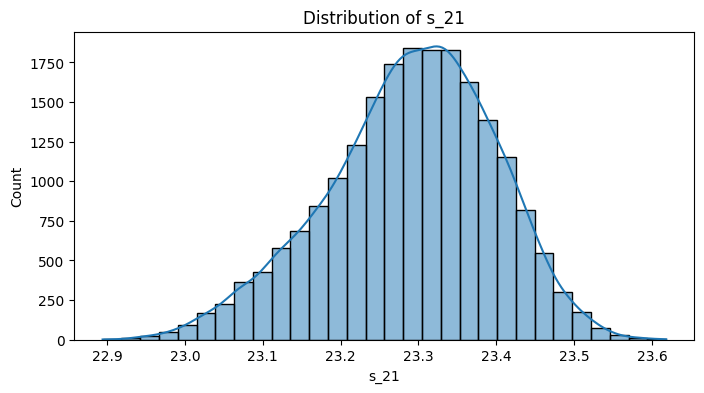

In [ ]:
for sensor in sensor_names:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[sensor], kde=True, bins=30)
    plt.title(f"Distribution of {sensor}")
    plt.show()